In [1]:
from __future__ import print_function
import tensorflow as tf

import cv2
import pandas as pd
import numpy as np
import glob

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [11]:
a = [1,2,3]

In [20]:
a[:1]

[1]

In [22]:
# {
#     'c': 3000,
#     'batch_size': 50,
#     'nb_epoch': 10,
#     'conv_2d': 1,
#     'dense': 2,
#     'dropout': 1,
#     'weight_init': 'uniform'
# }

In [16]:
c = -1 # select first <c> frames to from dataset

# load images filenames
files_dir = "/Users/leisure/ai/datasets/udacity/output"
files_list = glob.glob(files_dir + '/center/*.jpg')
files_list = files_list[:c]

# load labels and select based on timestamps
steering=pd.read_csv(files_dir + '/steering.csv')
camera=pd.read_csv(files_dir + '/camera.csv')
ts_camera = camera[camera['frame_id']=='center_camera'].timestamp.values
i = 0
y_full = []
for j in range(len(steering)):
    if (steering.timestamp.values[j]>ts_camera[i]):
        y_full.append(steering.angle.values[j])
        if i==len(ts_camera)-1:
            break
        else:
            i+=1
y_full = y_full[:c]

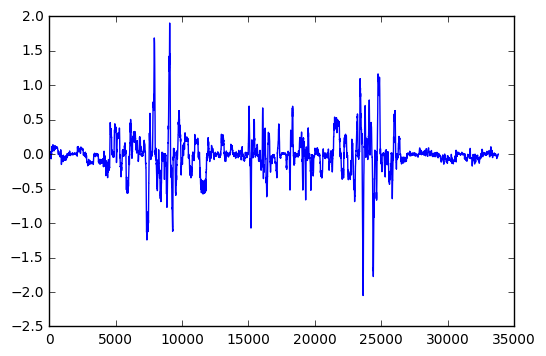

In [17]:
plt.plot(y_full)
plt.show()

In [18]:
len(y_full)

33807

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error

In [25]:
mse([3,4,5],[5,6,7])

4.0

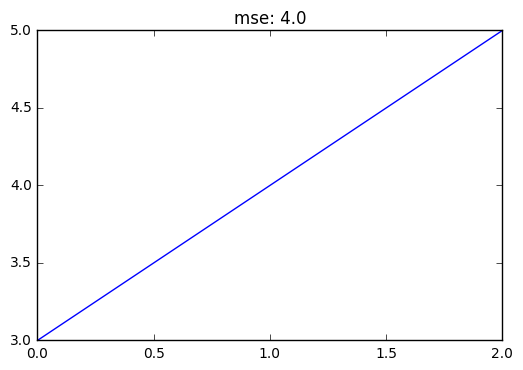

In [31]:
plt.plot([3,4,5])
plt.title("mse: " + str(mse([3,4,5],[5,6,7])))